In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [247]:
import glob

In [248]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [249]:
import warnings
warnings.filterwarnings('ignore')


In [250]:
index_list = glob.glob('./crawling_data/x_data/index/*.csv')
exchage_list = glob.glob('./crawling_data/x_data/exchange/*.csv')
fuel_list = glob.glob('./crawling_data/x_data/fuel/*.csv')

In [251]:
index_dutch = pd.read_csv(index_list[0],index_col=0)
index_euro = pd.read_csv(index_list[1],index_col=0)
index_london = pd.read_csv(index_list[2],index_col=0)
index_nasdaq = pd.read_csv(index_list[3],index_col=0)
index_paris = pd.read_csv(index_list[4],index_col=0)
index_shanghai = pd.read_csv(index_list[5],index_col=0)

In [252]:
exchange_cny = pd.read_csv(exchage_list[0],index_col=0)
exchange_eur = pd.read_csv(exchage_list[1],index_col=0)
exchange_gbp = pd.read_csv(exchage_list[2],index_col=0)
exchange_usd = pd.read_csv(exchage_list[3],index_col=0)

In [253]:
fuel_dubai = pd.read_csv(fuel_list[0],index_col=0)
fuel_brent = pd.read_csv(fuel_list[1],index_col=0)
fuel_texas = pd.read_csv(fuel_list[2],index_col=0)

In [254]:
index_dutch.drop(['start','high','low'], axis=1, inplace=True)
index_euro.drop(['start','high','low'], axis=1, inplace=True)
index_london.drop(['start','high','low'], axis=1, inplace=True)
index_nasdaq.drop(['start','high','low'], axis=1, inplace=True)
index_paris.drop(['start','high','low'], axis=1, inplace=True)
index_shanghai.drop(['start','high','low'], axis=1, inplace=True)
index_dutch.columns = ['date','dutch_close']
index_euro.columns = ['date','euro_close']
index_london.columns = ['date','london_close']
index_nasdaq.columns = ['date','nasdaq_close']
index_paris.columns = ['date','paris_close']
index_shanghai.columns = ['date','shanghai_close']

In [255]:
exchange_cny.columns = ['date','cny_exchange']
exchange_eur.columns = ['date','eur_exchange']
exchange_gbp.columns = ['date','gbp_exchange']
exchange_usd.columns = ['date','usd_exchange']

In [256]:
fuel_dubai.columns = ['date', 'dubai_fuel']
fuel_brent.columns = ['date', 'brent_fuel']
fuel_texas.columns = ['date', 'texas_fuel']
fuel_dubai.date = fuel_dubai.date.apply(lambda x : x.replace('-','.'))
fuel_brent.date = fuel_brent.date.apply(lambda x : x.replace('-','.'))
fuel_texas.date = fuel_texas.date.apply(lambda x : x.replace('-','.'))

In [257]:
data_df = pd.merge(left = index_dutch , right = index_euro, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = index_london, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = index_nasdaq, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = index_paris, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = index_shanghai, how = "inner", on = "date")

data_df = pd.merge(left = data_df , right = exchange_cny, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = exchange_eur, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = exchange_gbp, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = exchange_usd, how = "inner", on = "date")

data_df = pd.merge(left = data_df , right = fuel_dubai, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = fuel_brent, how = "inner", on = "date")
data_df = pd.merge(left = data_df , right = fuel_texas, how = "inner", on = "date")
data_df.date = data_df.date.apply(lambda x : pd.to_datetime(x, format='%Y.%m.%d'))

In [258]:
carbon_credit = pd.read_excel('./crawling_data/배출권.xls')
carbon_credit.dropna(inplace=True)
carbon_credit.reset_index(inplace=True)
carbon_credit.drop('index', axis=1, inplace=True)
carbon_credit.columns = ['date','carbon_credit_price']
carbon_credit.drop([0,1], inplace=True)
carbon_credit.date = carbon_credit.date.apply(lambda x : pd.to_datetime(x, format='%Y-%m-%d'))

In [259]:
merge_df = pd.merge(left = data_df , right = carbon_credit, how = "inner", on = "date")
merge_df

,date,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
0,2021-11-01,"15,806.29","4,280.47","7,288.62","15,595.92","6,893.29","3,544.48",184.34,"1,363.64","1,608.89","1,178.50",82.38,84.71,84.05,254.77
1,2021-10-29,"15,688.77","4,250.56","7,237.57","15,498.39","6,830.34","3,547.34",183.35,"1,357.50","1,606.33","1,174.00",81.37,83.72,83.57,262.68
2,2021-10-28,"15,696.33","4,233.87","7,249.47","15,448.12","6,804.22","3,518.42",183.04,"1,358.48","1,610.84","1,170.50",81.27,83.66,82.81,262.06
3,2021-10-27,"15,705.81","4,220.88","7,253.27","15,235.84","6,753.52","3,562.31",183.56,"1,360.73","1,609.51","1,173.50",81.44,83.87,82.66,268.01
4,2021-10-26,"15,757.06","4,223.97","7,277.62","15,235.72","6,766.51","3,597.64",183.02,"1,356.40","1,613.44","1,167.00",83.23,85.65,84.65,267.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,2016-01-06,"10,214.02","3,139.32","6,073.38","4,835.77","4,480.47","3,361.84",178.65,"1,287.96","1,756.44","1,200.00",28.99,34.23,33.97,34.94
1300,2016-01-05,"10,310.10","3,178.01","6,137.24","4,891.43","4,537.63","3,287.71",179.00,"1,283.71","1,746.66","1,189.50",30.84,36.42,35.97,36.06
1301,2016-01-04,"10,283.44","3,164.76","6,093.43","4,903.09","4,522.45","3,296.26",179.60,"1,299.65","1,756.77","1,189.50",32.10,37.22,36.76,36.29
1302,2015-12-30,"10,743.01","3,287.98","6,274.05","5,065.85","4,677.14","3,572.88",178.10,"1,283.14","1,738.97","1,173.00",34.57,36.46,36.60,37.05


In [260]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1303
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 1304 non-null   datetime64[ns]
 1   dutch_close          1304 non-null   object        
 2   euro_close           1304 non-null   object        
 3   london_close         1304 non-null   object        
 4   nasdaq_close         1304 non-null   object        
 5   paris_close          1304 non-null   object        
 6   shanghai_close       1304 non-null   object        
 7   cny_exchange         1304 non-null   float64       
 8   eur_exchange         1304 non-null   object        
 9   gbp_exchange         1304 non-null   object        
 10  usd_exchange         1304 non-null   object        
 11  dubai_fuel           1304 non-null   float64       
 12  brent_fuel           1304 non-null   float64       
 13  texas_fuel           1304 non-nul

In [261]:
merge_df['dutch_close'] = pd.to_numeric(merge_df['dutch_close'].apply(lambda x : x.replace(',','')))
merge_df['euro_close'] = pd.to_numeric(merge_df['euro_close'].apply(lambda x : x.replace(',','')))
merge_df['london_close'] = pd.to_numeric(merge_df['london_close'].apply(lambda x : x.replace(',','')))
merge_df['nasdaq_close'] = pd.to_numeric(merge_df['nasdaq_close'].apply(lambda x : x.replace(',','')))
merge_df['paris_close'] = pd.to_numeric(merge_df['paris_close'].apply(lambda x : x.replace(',','')))
merge_df['shanghai_close'] = pd.to_numeric(merge_df['shanghai_close'].apply(lambda x : x.replace(',','')))

merge_df['eur_exchange'] = pd.to_numeric(merge_df['eur_exchange'].apply(lambda x : x.replace(',','')))
merge_df['gbp_exchange'] = pd.to_numeric(merge_df['gbp_exchange'].apply(lambda x : x.replace(',','')))
merge_df['usd_exchange'] = pd.to_numeric(merge_df['usd_exchange'].apply(lambda x : x.replace(',','')))

merge_df['carbon_credit_price'] = pd.to_numeric(merge_df['carbon_credit_price'])
merge_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1303
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 1304 non-null   datetime64[ns]
 1   dutch_close          1304 non-null   float64       
 2   euro_close           1304 non-null   float64       
 3   london_close         1304 non-null   float64       
 4   nasdaq_close         1304 non-null   float64       
 5   paris_close          1304 non-null   float64       
 6   shanghai_close       1304 non-null   float64       
 7   cny_exchange         1304 non-null   float64       
 8   eur_exchange         1304 non-null   float64       
 9   gbp_exchange         1304 non-null   float64       
 10  usd_exchange         1304 non-null   float64       
 11  dubai_fuel           1304 non-null   float64       
 12  brent_fuel           1304 non-null   float64       
 13  texas_fuel           1304 non-nul

In [262]:
merge_df = merge_df.set_index('date')
merge_df = merge_df.sort_index(ascending=True)
merge_df

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2015-12-29,10860.14,3314.28,6314.57,5107.94,4701.36,3563.74,177.71,1283.25,1741.53,1168.5,34.66,37.79,37.87,37.32
2015-12-30,10743.01,3287.98,6274.05,5065.85,4677.14,3572.88,178.10,1283.14,1738.97,1173.0,34.57,36.46,36.60,37.05
2016-01-04,10283.44,3164.76,6093.43,4903.09,4522.45,3296.26,179.60,1299.65,1756.77,1189.5,32.10,37.22,36.76,36.29
2016-01-05,10310.10,3178.01,6137.24,4891.43,4537.63,3287.71,179.00,1283.71,1746.66,1189.5,30.84,36.42,35.97,36.06
2016-01-06,10214.02,3139.32,6073.38,4835.77,4480.47,3361.84,178.65,1287.96,1756.44,1200.0,28.99,34.23,33.97,34.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26,15757.06,4223.97,7277.62,15235.72,6766.51,3597.64,183.02,1356.40,1613.44,1167.0,83.23,85.65,84.65,267.61
2021-10-27,15705.81,4220.88,7253.27,15235.84,6753.52,3562.31,183.56,1360.73,1609.51,1173.5,81.44,83.87,82.66,268.01
2021-10-28,15696.33,4233.87,7249.47,15448.12,6804.22,3518.42,183.04,1358.48,1610.84,1170.5,81.27,83.66,82.81,262.06


In [263]:
merge_df.to_csv('merge_df.csv')

### ======================== 데이터 전처리 끝, 분석 시작 ===============================

# EDA

<AxesSubplot:>

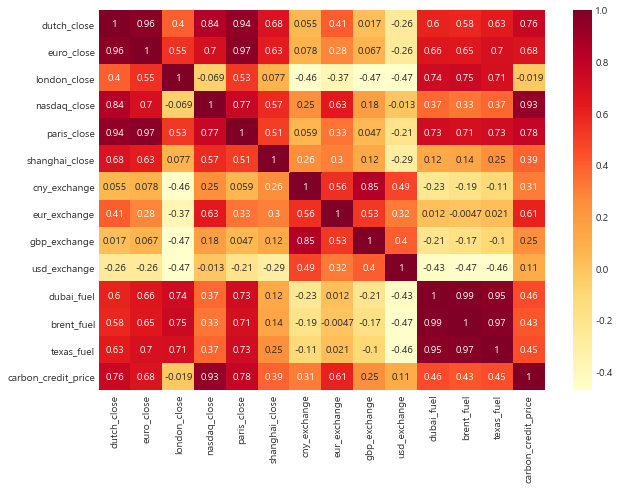

In [179]:
plt.figure(figsize=(10,7))
sns.heatmap(merge_df.corr(),annot = True, cmap = 'YlOrRd')

### 탄소배출권과 주요 지표의 선형관계 확인


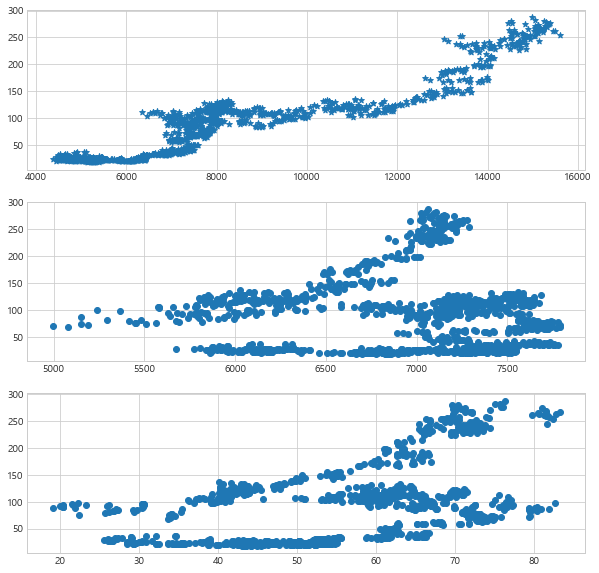

In [192]:
# merge_df[['nasdaq_close','carbon_credit_price']].plot()
plt.figure(figsize = (10,10))

plt.subplot(311)
plt.scatter(x='nasdaq_close', y='carbon_credit_price', data = merge_df, marker = '*')

plt.subplot(312)
plt.scatter(x='london_close', y='carbon_credit_price', data = merge_df, )

plt.subplot(313)
plt.scatter(x='dubai_fuel', y='carbon_credit_price', data = merge_df)

### 날짜를 오름차순으로 정렬

In [193]:
df_new = merge_df.set_index('date')
df_new = df_new.sort_index(ascending=True)
df_new

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2015-12-29,10860.14,3314.28,6314.57,5107.94,4701.36,3563.74,177.71,1283.25,1741.53,1168.5,34.66,37.79,37.87,37.32
2015-12-30,10743.01,3287.98,6274.05,5065.85,4677.14,3572.88,178.10,1283.14,1738.97,1173.0,34.57,36.46,36.60,37.05
2016-01-04,10283.44,3164.76,6093.43,4903.09,4522.45,3296.26,179.60,1299.65,1756.77,1189.5,32.10,37.22,36.76,36.29
2016-01-05,10310.10,3178.01,6137.24,4891.43,4537.63,3287.71,179.00,1283.71,1746.66,1189.5,30.84,36.42,35.97,36.06
2016-01-06,10214.02,3139.32,6073.38,4835.77,4480.47,3361.84,178.65,1287.96,1756.44,1200.0,28.99,34.23,33.97,34.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26,15757.06,4223.97,7277.62,15235.72,6766.51,3597.64,183.02,1356.40,1613.44,1167.0,83.23,85.65,84.65,267.61
2021-10-27,15705.81,4220.88,7253.27,15235.84,6753.52,3562.31,183.56,1360.73,1609.51,1173.5,81.44,83.87,82.66,268.01
2021-10-28,15696.33,4233.87,7249.47,15448.12,6804.22,3518.42,183.04,1358.48,1610.84,1170.5,81.27,83.66,82.81,262.06


In [194]:
merge_df = merge_df.set_index('date')
merge_df = merge_df.sort_index(ascending=True)
merge_df

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2015-12-29,10860.14,3314.28,6314.57,5107.94,4701.36,3563.74,177.71,1283.25,1741.53,1168.5,34.66,37.79,37.87,37.32
2015-12-30,10743.01,3287.98,6274.05,5065.85,4677.14,3572.88,178.10,1283.14,1738.97,1173.0,34.57,36.46,36.60,37.05
2016-01-04,10283.44,3164.76,6093.43,4903.09,4522.45,3296.26,179.60,1299.65,1756.77,1189.5,32.10,37.22,36.76,36.29
2016-01-05,10310.10,3178.01,6137.24,4891.43,4537.63,3287.71,179.00,1283.71,1746.66,1189.5,30.84,36.42,35.97,36.06
2016-01-06,10214.02,3139.32,6073.38,4835.77,4480.47,3361.84,178.65,1287.96,1756.44,1200.0,28.99,34.23,33.97,34.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26,15757.06,4223.97,7277.62,15235.72,6766.51,3597.64,183.02,1356.40,1613.44,1167.0,83.23,85.65,84.65,267.61
2021-10-27,15705.81,4220.88,7253.27,15235.84,6753.52,3562.31,183.56,1360.73,1609.51,1173.5,81.44,83.87,82.66,268.01
2021-10-28,15696.33,4233.87,7249.47,15448.12,6804.22,3518.42,183.04,1358.48,1610.84,1170.5,81.27,83.66,82.81,262.06


### 2015-12-29 을 기준으로 그 이후의 데이터를 나눔

In [195]:
for i in df_new.columns :
    df_new['{}'.format(i)] = df_new['{}'.format(i)].apply(lambda x : x / df_new['{}'.format(i)][0])

<AxesSubplot:xlabel='date'>

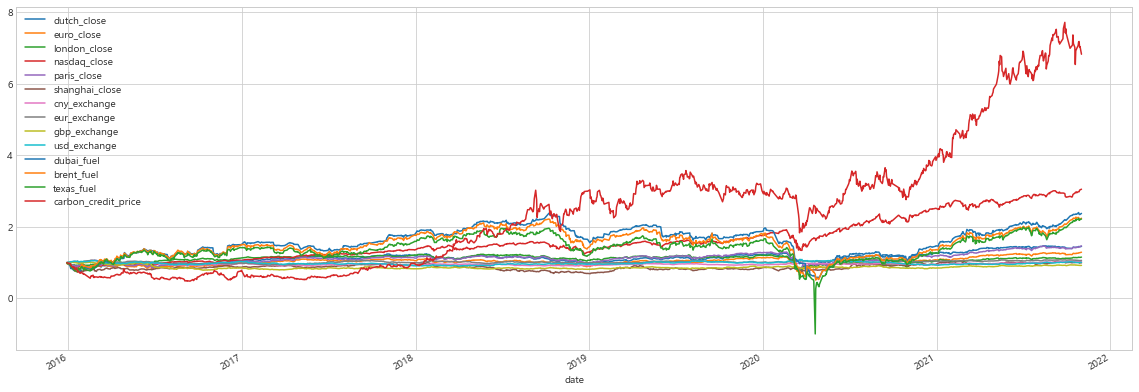

In [196]:
df_new.plot(figsize = (20,7))

<AxesSubplot:>

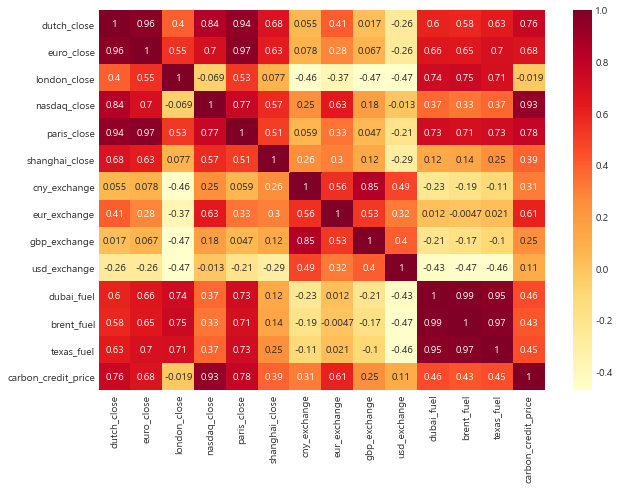

In [197]:
plt.figure(figsize=(10,7))
sns.heatmap(df_new.corr(),annot = True, cmap = 'YlOrRd')

### 변동률로 변환 (기준일 2016-01-04)

In [220]:
df_change = merge_df.copy()
df_change

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price,carbon_3d,carbon_5d,date,carbon_3d_std,upperb,lowerb
date,,,,,,,,,,,,,,,,,,,,
2016-01-06,10214.02,3139.32,6073.38,4835.77,4480.47,3361.84,178.65,1287.96,1756.44,1200.0,28.99,34.23,33.97,34.94,35.763333,36.332,2016-01-06,NaN,NaN,NaN
2016-01-07,9979.85,3084.68,5954.08,4689.43,4403.58,3125.00,179.51,1295.38,1749.17,1200.2,29.00,33.75,33.27,34.00,35.000000,35.668,2016-01-07,NaN,NaN,NaN
2016-01-08,9849.34,3033.47,5912.44,4643.63,4333.76,3186.41,179.41,1303.86,1752.35,1199.5,29.16,33.55,33.16,33.38,34.106667,34.934,2016-01-08,0.785451,35.677569,32.535765
2016-01-11,9825.07,3027.49,5871.83,4637.99,4312.74,3016.70,182.33,1311.83,1756.18,1206.5,27.86,31.55,31.41,32.08,33.153333,34.092,2016-01-11,0.979864,35.113061,31.193605
2016-01-12,9985.43,3064.66,5929.24,4685.92,4378.75,3022.86,184.07,1319.44,1762.25,1212.5,27.33,30.86,30.44,31.99,32.483333,33.278,2016-01-12,0.777839,34.039011,30.927656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26,15757.06,4223.97,7277.62,15235.72,6766.51,3597.64,183.02,1356.40,1613.44,1167.0,83.23,85.65,84.65,267.61,264.090000,262.042,2021-10-26,3.447448,270.984897,257.195103
2021-10-27,15705.81,4220.88,7253.27,15235.84,6753.52,3562.31,183.56,1360.73,1609.51,1173.5,81.44,83.87,82.66,268.01,266.520000,263.940,2021-10-27,2.243279,271.006558,262.033442
2021-10-28,15696.33,4233.87,7249.47,15448.12,6804.22,3518.42,183.04,1358.48,1610.84,1170.5,81.27,83.66,82.81,262.06,265.893333,264.468,2021-10-28,3.325783,272.544900,259.241767


In [221]:
df_change.columns

Index(['dutch_close', 'euro_close', 'london_close', 'nasdaq_close',
       'paris_close', 'shanghai_close', 'cny_exchange', 'eur_exchange',
       'gbp_exchange', 'usd_exchange', 'dubai_fuel', 'brent_fuel',
       'texas_fuel', 'carbon_credit_price', 'carbon_3d', 'carbon_5d', 'date',
       'carbon_3d_std', 'upperb', 'lowerb'],
      dtype='object')

In [223]:
df = pd.read_csv('merge_df.csv', index_col = 0)
df.head()

,date,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
0,2021-11-01,15806.29,4280.47,7288.62,15595.92,6893.29,3544.48,184.34,1363.64,1608.89,1178.5,82.38,84.71,84.05,254.77
1,2021-10-29,15688.77,4250.56,7237.57,15498.39,6830.34,3547.34,183.35,1357.50,1606.33,1174.0,81.37,83.72,83.57,262.68
2,2021-10-28,15696.33,4233.87,7249.47,15448.12,6804.22,3518.42,183.04,1358.48,1610.84,1170.5,81.27,83.66,82.81,262.06
3,2021-10-27,15705.81,4220.88,7253.27,15235.84,6753.52,3562.31,183.56,1360.73,1609.51,1173.5,81.44,83.87,82.66,268.01
4,2021-10-26,15757.06,4223.97,7277.62,15235.72,6766.51,3597.64,183.02,1356.40,1613.44,1167.0,83.23,85.65,84.65,267.61


In [227]:
# df = df.set_index('date')
df = df.sort_index(ascending = True)
df.head()

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2015-12-29,10860.14,3314.28,6314.57,5107.94,4701.36,3563.74,177.71,1283.25,1741.53,1168.5,34.66,37.79,37.87,37.32
2015-12-30,10743.01,3287.98,6274.05,5065.85,4677.14,3572.88,178.10,1283.14,1738.97,1173.0,34.57,36.46,36.60,37.05
2016-01-04,10283.44,3164.76,6093.43,4903.09,4522.45,3296.26,179.60,1299.65,1756.77,1189.5,32.10,37.22,36.76,36.29
2016-01-05,10310.10,3178.01,6137.24,4891.43,4537.63,3287.71,179.00,1283.71,1746.66,1189.5,30.84,36.42,35.97,36.06
2016-01-06,10214.02,3139.32,6073.38,4835.77,4480.47,3361.84,178.65,1287.96,1756.44,1200.0,28.99,34.23,33.97,34.94


In [228]:
df_new_change = (df - df.shift())/df.shift()
df_new_change

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2015-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-30,-0.010785,-0.007935,-0.006417,-0.008240,-0.005152,0.002565,0.002195,-0.000086,-0.001470,0.003851,-0.002597,-0.035194,-0.033536,-0.007235
2016-01-04,-0.042779,-0.037476,-0.028788,-0.032129,-0.033074,-0.077422,0.008422,0.012867,0.010236,0.014066,-0.071449,0.020845,0.004372,-0.020513
2016-01-05,0.002593,0.004187,0.007190,-0.002378,0.003357,-0.002594,-0.003341,-0.012265,-0.005755,0.000000,-0.039252,-0.021494,-0.021491,-0.006338
2016-01-06,-0.009319,-0.012174,-0.010405,-0.011379,-0.012597,0.022548,-0.001955,0.003311,0.005599,0.008827,-0.059987,-0.060132,-0.055602,-0.031059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26,0.010118,0.008514,0.007587,0.000592,0.007991,-0.003385,-0.002453,-0.003416,0.000496,-0.003416,0.006165,0.005636,0.010626,0.013905
2021-10-27,-0.003253,-0.000732,-0.003346,0.000008,-0.001920,-0.009820,0.002950,0.003192,-0.002436,0.005570,-0.021507,-0.020782,-0.023509,0.001495
2021-10-28,-0.000604,0.003078,-0.000524,0.013933,0.007507,-0.012321,-0.002833,-0.001654,0.000826,-0.002556,-0.002087,-0.002504,0.001815,-0.022201


In [229]:
df_new_change.dropna(inplace = True)
df_new_change

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2015-12-30,-0.010785,-0.007935,-0.006417,-0.008240,-0.005152,0.002565,0.002195,-0.000086,-0.001470,0.003851,-0.002597,-0.035194,-0.033536,-0.007235
2016-01-04,-0.042779,-0.037476,-0.028788,-0.032129,-0.033074,-0.077422,0.008422,0.012867,0.010236,0.014066,-0.071449,0.020845,0.004372,-0.020513
2016-01-05,0.002593,0.004187,0.007190,-0.002378,0.003357,-0.002594,-0.003341,-0.012265,-0.005755,0.000000,-0.039252,-0.021494,-0.021491,-0.006338
2016-01-06,-0.009319,-0.012174,-0.010405,-0.011379,-0.012597,0.022548,-0.001955,0.003311,0.005599,0.008827,-0.059987,-0.060132,-0.055602,-0.031059
2016-01-07,-0.022926,-0.017405,-0.019643,-0.030262,-0.017161,-0.070450,0.004814,0.005761,-0.004139,0.000167,0.000345,-0.014023,-0.020606,-0.026903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26,0.010118,0.008514,0.007587,0.000592,0.007991,-0.003385,-0.002453,-0.003416,0.000496,-0.003416,0.006165,0.005636,0.010626,0.013905
2021-10-27,-0.003253,-0.000732,-0.003346,0.000008,-0.001920,-0.009820,0.002950,0.003192,-0.002436,0.005570,-0.021507,-0.020782,-0.023509,0.001495
2021-10-28,-0.000604,0.003078,-0.000524,0.013933,0.007507,-0.012321,-0.002833,-0.001654,0.000826,-0.002556,-0.002087,-0.002504,0.001815,-0.022201


<AxesSubplot:>

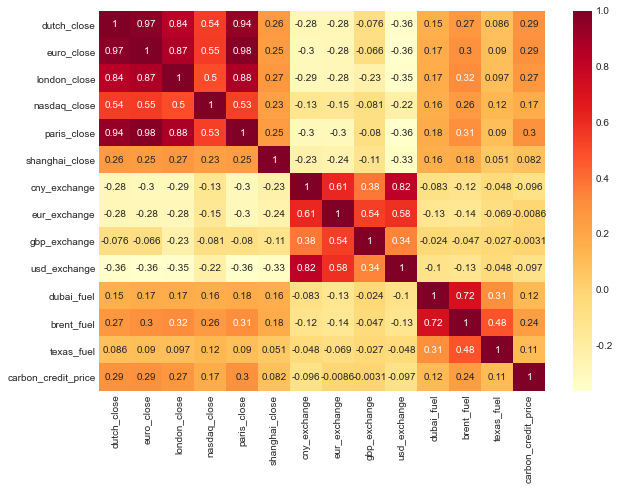

In [230]:
plt.figure(figsize=(10,7))
sns.heatmap(df_new_change.corr(),annot = True, cmap = 'YlOrRd')

### 탄소배출권의 5일 이동평균 3일 이동평균( 원래 가격)

In [231]:
df.head()

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2015-12-29,10860.14,3314.28,6314.57,5107.94,4701.36,3563.74,177.71,1283.25,1741.53,1168.5,34.66,37.79,37.87,37.32
2015-12-30,10743.01,3287.98,6274.05,5065.85,4677.14,3572.88,178.10,1283.14,1738.97,1173.0,34.57,36.46,36.60,37.05
2016-01-04,10283.44,3164.76,6093.43,4903.09,4522.45,3296.26,179.60,1299.65,1756.77,1189.5,32.10,37.22,36.76,36.29
2016-01-05,10310.10,3178.01,6137.24,4891.43,4537.63,3287.71,179.00,1283.71,1746.66,1189.5,30.84,36.42,35.97,36.06
2016-01-06,10214.02,3139.32,6073.38,4835.77,4480.47,3361.84,178.65,1287.96,1756.44,1200.0,28.99,34.23,33.97,34.94


In [232]:
df['carbon_3d'] = df['carbon_credit_price'].rolling(3).mean()
df['carbon_5d'] = df['carbon_credit_price'].rolling(5).mean()

In [233]:
df.dropna(inplace = True)

### 탄소배출권의 종가가 정규분포를 이루는지 확인
- 탄소배출권의 종가는 정규분포를 이룬다.

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  4.,  0.,  1.,  2.,  2.,  5.,  2.,  2.,
         6., 10.,  6., 10.,  7., 11., 13., 12., 33., 28., 29., 36., 50.,
        49., 55., 59., 57., 61., 68., 79., 59., 56., 59., 52., 57., 53.,
        40., 36., 28., 22., 20., 21., 18., 13., 12.,  9.,  8.,  5.,  2.,
         3.,  2.,  2.,  2.,  1.,  3.,  0.,  4.,  1.,  0.,  0.,  0.,  1.,
         1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  2.]),
 array([-0.19353741, -0.19018218, -0.18682695, -0.18347171, -0.18011648,
        -0.17676124, -0.17340601, -0.17005077, -0.16669554, -0.1633403 ,
        -0.15998507, -0.15662983, -0.1532746 , -0.14991936, -0.14656413,
        -0.14320889, -0.13985366, -0.13649842, -0.13314319, -0.12978795,
        -0.12643272, -0.12307748, -0.11972225, -0.11636702, -0.11301178,
        -0.10965655, -0.10630131, -0.10294608, -0.09959084, -0.096235

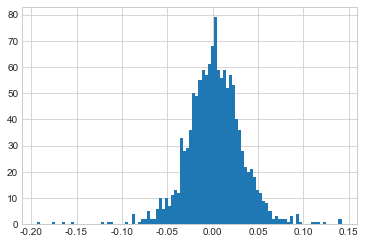

In [234]:
plt.hist(df.carbon_credit_price.pct_change(), bins=100)

### 3일 이동평균선과 5일 이동평균선을 10일차부터 그림

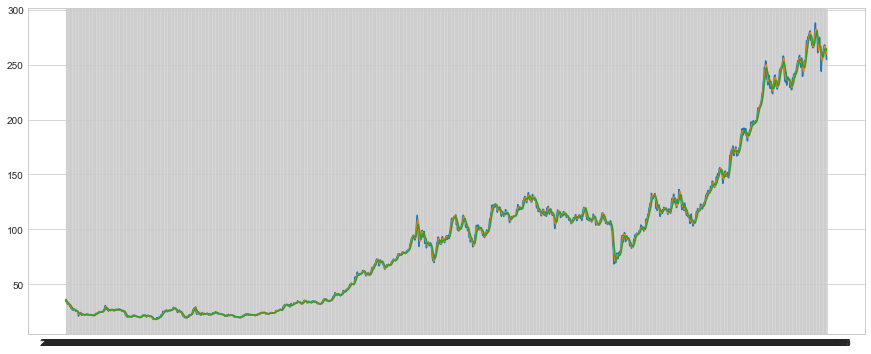

In [235]:
plt.figure(figsize = (15,6))
plt.plot(df['carbon_credit_price'])
plt.plot(df['carbon_3d'])
plt.plot(df['carbon_5d'])

### 구별이 잘 안되어 plotly 로 다시 그리기

In [236]:
import plotly.express as px

In [237]:
df['date'] = df.index

In [238]:
px.line(df, x = 'date', y = ['carbon_credit_price','carbon_3d','carbon_5d'])
# px.line(merge_df['carbon_3d'][10:])
# px.line(merge_df['carbon_5d'][10:])

#### 탄소배출권의 값이 3일 이동평균선보다 밑에 있으면 매수시점이고 위에 있으면 매도시점인 것을 알 수 있다.

### bollenger band 3일

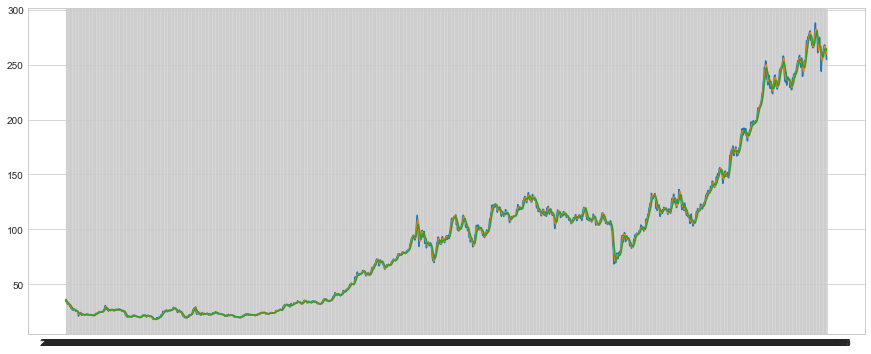

In [239]:
plt.figure(figsize = (15,6))
plt.plot(df['carbon_credit_price'])
plt.plot(df['carbon_3d'])
plt.plot(df['carbon_5d'])

Text(0.5, 1.0, 'Bollinger Bands')

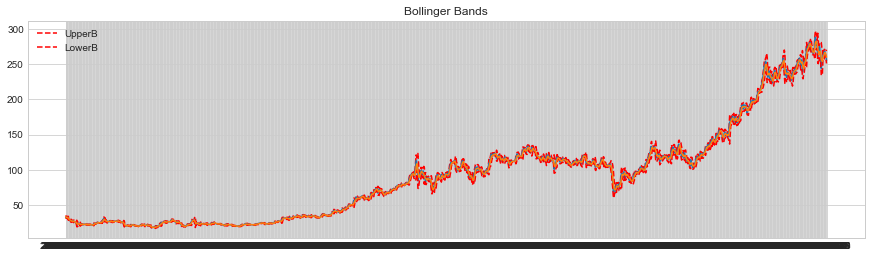

In [240]:
plt.style.use('seaborn-whitegrid')
df['carbon_3d']
df['carbon_3d_std'] = df['carbon_credit_price'].rolling(3).std()
df['upperb'] = df['carbon_3d'] + (df['carbon_3d_std']*2)
df['lowerb'] = df['carbon_3d'] - (df['carbon_3d_std']*2)
df = df[3:].copy()

plt.figure(figsize=(15,4))
plt.plot(df.index, df.upperb, 'r--', label='UpperB')
plt.plot(df.index, df.carbon_credit_price)    
plt.plot(df.index, df.lowerb, 'r--', label='LowerB')
plt.plot(df.index, df.carbon_3d)
plt.fill_between(df.index, df.lowerb, df.upperb, alpha=0.2)
plt.legend(loc='best')
plt.title('Bollinger Bands')

In [241]:
px.line(df, x = 'date', y = ['carbon_credit_price','upperb','lowerb'])

In [214]:
df_new.head()

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2015-12-29,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-12-30,0.989215,0.992065,0.993583,0.991760,0.994848,1.002565,1.002195,0.999914,0.998530,1.003851,0.997403,0.964806,0.966464,0.992765
2016-01-04,0.946898,0.954886,0.964979,0.959896,0.961945,0.924944,1.010635,1.012780,1.008751,1.017972,0.926140,0.984917,0.970689,0.972401
2016-01-05,0.949352,0.958884,0.971917,0.957613,0.965174,0.922545,1.007259,1.000358,1.002946,1.017972,0.889786,0.963747,0.949828,0.966238
2016-01-06,0.940505,0.947210,0.961804,0.946716,0.953016,0.943346,1.005290,1.003670,1.008561,1.026958,0.836411,0.905795,0.897016,0.936227


In [213]:
df_new.columns

Index(['dutch_close', 'euro_close', 'london_close', 'nasdaq_close',
       'paris_close', 'shanghai_close', 'cny_exchange', 'eur_exchange',
       'gbp_exchange', 'usd_exchange', 'dubai_fuel', 'brent_fuel',
       'texas_fuel', 'carbon_credit_price'],
      dtype='object')

In [275]:
df3 = pd.read_csv('merge_df.csv', index_col=0)

In [276]:
x = df3[['dutch_close', 'euro_close', 'london_close', 'nasdaq_close',
       'paris_close', 'shanghai_close', 'cny_exchange', 'eur_exchange',
       'gbp_exchange', 'usd_exchange', 'dubai_fuel', 'brent_fuel',
       'texas_fuel']]
y = df3['carbon_credit_price']

In [277]:
x.head()

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel
date,,,,,,,,,,,,,
2015-12-29,10860.14,3314.28,6314.57,5107.94,4701.36,3563.74,177.71,1283.25,1741.53,1168.5,34.66,37.79,37.87
2015-12-30,10743.01,3287.98,6274.05,5065.85,4677.14,3572.88,178.10,1283.14,1738.97,1173.0,34.57,36.46,36.60
2016-01-04,10283.44,3164.76,6093.43,4903.09,4522.45,3296.26,179.60,1299.65,1756.77,1189.5,32.10,37.22,36.76
2016-01-05,10310.10,3178.01,6137.24,4891.43,4537.63,3287.71,179.00,1283.71,1746.66,1189.5,30.84,36.42,35.97
2016-01-06,10214.02,3139.32,6073.38,4835.77,4480.47,3361.84,178.65,1287.96,1756.44,1200.0,28.99,34.23,33.97


In [267]:
y.head()

date
2015-12-29    37.32
2015-12-30    37.05
2016-01-04    36.29
2016-01-05    36.06
2016-01-06    34.94
Name: carbon_credit_price, dtype: float64

# 1. 5일 평균으로 탄소배출권 회귀모델(원본 데이터를 standardscaler를 이용하여 회귀분석)
- x : 탄소배출권을 제외한 모든 데이터의 5일 이동평균
- y : 탄소배출권
- y를 shift 함수를 이용하여 하루를 뒤로 미뤄 회귀분석 실시(당일 x값이 다음날 y값에 대응될 수 있게 함)

In [268]:
from sklearn.model_selection import train_test_split

In [297]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [270]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [271]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()

In [278]:
x1 = x.rolling(5).mean().dropna()
# x1 = x1[1:]
x1.head()

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel
date,,,,,,,,,,,,,
2016-01-06,10482.142,3216.870,6178.534,4960.816,4583.810,3416.486,178.612,1287.542,1748.074,1184.10,32.232,36.424,36.234
2016-01-07,10306.084,3170.950,6106.436,4877.114,4524.254,3328.738,178.972,1289.968,1749.602,1190.44,31.100,35.616,35.314
2016-01-08,10127.350,3120.048,6034.114,4792.670,4455.578,3251.444,179.234,1294.112,1752.278,1195.74,30.018,35.034,34.626
2016-01-11,10035.676,3092.594,5989.794,4739.650,4413.636,3195.532,179.780,1296.548,1752.160,1199.14,29.170,33.900,33.556
2016-01-12,9970.742,3069.924,5948.194,4698.548,4381.860,3142.562,180.794,1303.694,1755.278,1203.74,28.468,32.788,32.450


In [288]:
x1.shape
x1_new = x1[:-1]
x1_new.shape

(1299, 13)

In [279]:
y1 = y[4:]
# y1 = y1.shift()
y1.shape

(1300,)

In [285]:
y1_new = y1.shift(-1)

In [290]:
y1_new = y1_new[:-1]

In [291]:
print(y1_new.shape)
print(x1_new.shape)


(1299,)
(1299, 13)


In [292]:
x_train, x_test, y_train, y_test = train_test_split(x1_new, y1_new, random_state = 10)

In [293]:
# standardscaler를 이용하여 데이터 표준화
scale = StandardScaler()

scale.fit(x_train)

x_train_scale = scale.transform(x_train)
x_test_scale = scale.transform(x_test)

In [294]:
from sklearn.metrics import mean_squared_error, r2_score

In [309]:
# 회귀분석
lr.fit(x_train_scale, y_train)
lr_preds = lr.predict(x_test_scale)
print('LinearRegression')
print('rmse :', np.sqrt(mean_squared_error(y_test, lr_preds)))
print('mse :',(mean_squared_error(y_test, lr_preds)))
print('r_score :', r2_score(y_test, lr_preds))
print('회귀계수 :\n' , lr.coef_)
print('절편 :' , lr.intercept_)
print()

rid.fit(x_train_scale, y_train)
rid_preds = rid.predict(x_test_scale)
print('Ridge')
print('rmse :', np.sqrt(mean_squared_error(y_test, rid_preds)))
print('mse :',(mean_squared_error(y_test, rid_preds)))
print('r_score :', r2_score(y_test, rid_preds))
print('회귀계수 :\n' , rid.coef_)
print('절편 :' , rid.intercept_)
print()

las.fit(x_train_scale, y_train)
las_preds = las.predict(x_test_scale)
print('Lasso')
print('rmse :', np.sqrt(mean_squared_error(y_test, las_preds)))
print('mse :',(mean_squared_error(y_test, las_preds)))
print('r_score :', r2_score(y_test, las_preds))
print('회귀계수 :\n' , las.coef_)
print('절편 :' , las.intercept_)
print()

xgb.fit(x_train_scale, y_train)
xgb_preds = xgb.predict(x_test_scale)
print('xgb')
print('rmse :', np.sqrt(mean_squared_error(y_test, xgb_preds)))
print('mse :',(mean_squared_error(y_test, xgb_preds)))
print('r_score :', r2_score(y_test, xgb_preds))
# print('회귀계수 :' , xgb.coef_)
# print('절편 :' , xgb.intercept_)
print()

lgbm.fit(x_train_scale, y_train)
lgbm_preds = lgbm.predict(x_test_scale)
print('lgbm')
print('rmse :', np.sqrt(mean_squared_error(y_test, lgbm_preds)))
print('mse :',(mean_squared_error(y_test, lgbm_preds)))
print('r_score :', r2_score(y_test, lgbm_preds))
# print('회귀계수 :' , lgbm.coef_)
# print('절편 :' , lgbm.intercept_)
print()

rfr.fit(x_train_scale, y_train)
rfr_preds = rfr.predict(x_test_scale)
print('rfc')
print('rmse :', np.sqrt(mean_squared_error(y_test, rfr_preds)))
print('mse :',(mean_squared_error(y_test, rfr_preds)))
print('r_score :', r2_score(y_test, rfr_preds))
# print('회귀계수 :' , rfr.coef_)
# print('절편 :' , rfr.intercept_)
print()

LinearRegression
rmse : 12.821448110500839
mse : 164.38953165026555
r_score : 0.959419640901458
회귀계수 :
 [-43.8579728   27.45954117 -15.12910947  62.62592254  22.49658124
  -7.5671041    8.0738826   -0.56056661  -9.0571226    5.86963328
  -6.7334268   27.43633903  -5.71588004]
절편 : 92.18593429158102

Ridge
rmse : 12.816618332883928
mse : 164.26570549081643
r_score : 0.9594502079939352
회귀계수 :
 [-36.81774834  18.48073848 -14.70895396  59.67935026  26.92144263
  -7.45370306   8.39713674  -1.14692815  -8.09141502   5.82708002
  -3.89730877  22.49111385  -4.09143008]
절편 : 92.18593429158102

Lasso
rmse : 15.245779789223086
mse : 232.4338013814831
r_score : 0.9426225804525885
회귀계수 :
 [ -0.           0.          -0.          58.68680636   5.93076192
 -10.45187625   7.50555449  -0.           0.           5.97743643
   7.59630517   2.46098373   0.        ]
절편 : 92.18593429158109

xgb
rmse : 3.4614004848355036
mse : 11.981293316419459
r_score : 0.9970423592039933

lgbm
rmse : 3.652084891769476
mse

## 최적값 찾기

### cross validation

In [300]:
from sklearn.model_selection import cross_val_score

models = [lr, rid, las, xgb, lgbm, rfr]

for m in models:
    scores = cross_val_score(m, x_train_scale, y_train,  cv = 10)
    print(m.__class__.__name__)
    print('평균 accuracy score :' , np.mean(scores))
    print('표준편차 : ', np.std(scores))
    print()

LinearRegression
평균 accuracy score : 0.9629294170566107
표준편차 :  0.005683548335585275

Ridge
평균 accuracy score : 0.9627811423876198
표준편차 :  0.005661581571223909

Lasso
평균 accuracy score : 0.949621478422148
표준편차 :  0.006024900684744314

XGBRegressor
평균 accuracy score : 0.9968511360333745
표준편차 :  0.0007044239805337313

LGBMRegressor
평균 accuracy score : 0.9961044261722533
표준편차 :  0.0010551340077453984

RandomForestRegressor
평균 accuracy score : 0.9969923077452225
표준편차 :  0.0007377500043706796



## gridsearch

In [301]:
params = {'alpha' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
models1 = [rid, las, xgb, lgbm]

In [302]:
from sklearn.model_selection import GridSearchCV

In [303]:
for m in models1:
    grid = GridSearchCV(m, param_grid = params )
    grid.fit(x_train_scale, y_train)
#     print('{}'.format(m))
    print(m.__class__.__name__)
    print('best_para : ', grid.best_params_)
    print('best_score : ', grid.best_score_)
    print()

Ridge
best_para :  {'alpha': 0.1}
best_score :  0.963079654821958

Lasso
best_para :  {'alpha': 0.001}
best_score :  0.9630770071723876

XGBRegressor
best_para :  {'alpha': 0.001}
best_score :  0.9963829078348072

LGBMRegressor
best_para :  {'alpha': 0.001}
best_score :  0.9949612514843535



# 2. 탄소배출권 변동률 회귀분석
- x : 탄소배출권을 제외한 변동률
- y : 탄소배출권의 변동률(1일 후)

In [312]:
df_change = pd.read_csv('merge_df.csv', index_col=0)
df_change.head()

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2015-12-29,10860.14,3314.28,6314.57,5107.94,4701.36,3563.74,177.71,1283.25,1741.53,1168.5,34.66,37.79,37.87,37.32
2015-12-30,10743.01,3287.98,6274.05,5065.85,4677.14,3572.88,178.10,1283.14,1738.97,1173.0,34.57,36.46,36.60,37.05
2016-01-04,10283.44,3164.76,6093.43,4903.09,4522.45,3296.26,179.60,1299.65,1756.77,1189.5,32.10,37.22,36.76,36.29
2016-01-05,10310.10,3178.01,6137.24,4891.43,4537.63,3287.71,179.00,1283.71,1746.66,1189.5,30.84,36.42,35.97,36.06
2016-01-06,10214.02,3139.32,6073.38,4835.77,4480.47,3361.84,178.65,1287.96,1756.44,1200.0,28.99,34.23,33.97,34.94


In [317]:
df_new_change = (df_change - df_change.shift())/df_change.shift()
df_new_change.dropna(inplace = True)

In [318]:
df_new_change.head()

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2015-12-30,-0.010785,-0.007935,-0.006417,-0.008240,-0.005152,0.002565,0.002195,-0.000086,-0.001470,0.003851,-0.002597,-0.035194,-0.033536,-0.007235
2016-01-04,-0.042779,-0.037476,-0.028788,-0.032129,-0.033074,-0.077422,0.008422,0.012867,0.010236,0.014066,-0.071449,0.020845,0.004372,-0.020513
2016-01-05,0.002593,0.004187,0.007190,-0.002378,0.003357,-0.002594,-0.003341,-0.012265,-0.005755,0.000000,-0.039252,-0.021494,-0.021491,-0.006338
2016-01-06,-0.009319,-0.012174,-0.010405,-0.011379,-0.012597,0.022548,-0.001955,0.003311,0.005599,0.008827,-0.059987,-0.060132,-0.055602,-0.031059
2016-01-07,-0.022926,-0.017405,-0.019643,-0.030262,-0.017161,-0.070450,0.004814,0.005761,-0.004139,0.000167,0.000345,-0.014023,-0.020606,-0.026903


In [319]:
x_c = df_new_change[['dutch_close', 'euro_close', 'london_close', 'nasdaq_close',
       'paris_close', 'shanghai_close', 'cny_exchange', 'eur_exchange',
       'gbp_exchange', 'usd_exchange', 'dubai_fuel', 'brent_fuel',
       'texas_fuel']]
y_c = df_new_change['carbon_credit_price']

In [323]:
x_c.head()

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel
date,,,,,,,,,,,,,
2015-12-30,-0.010785,-0.007935,-0.006417,-0.008240,-0.005152,0.002565,0.002195,-0.000086,-0.001470,0.003851,-0.002597,-0.035194,-0.033536
2016-01-04,-0.042779,-0.037476,-0.028788,-0.032129,-0.033074,-0.077422,0.008422,0.012867,0.010236,0.014066,-0.071449,0.020845,0.004372
2016-01-05,0.002593,0.004187,0.007190,-0.002378,0.003357,-0.002594,-0.003341,-0.012265,-0.005755,0.000000,-0.039252,-0.021494,-0.021491
2016-01-06,-0.009319,-0.012174,-0.010405,-0.011379,-0.012597,0.022548,-0.001955,0.003311,0.005599,0.008827,-0.059987,-0.060132,-0.055602
2016-01-07,-0.022926,-0.017405,-0.019643,-0.030262,-0.017161,-0.070450,0.004814,0.005761,-0.004139,0.000167,0.000345,-0.014023,-0.020606


In [333]:
x_c1 = x_c[:-1]

In [325]:
y_c1 = y_c.shift(-1)

In [327]:
y_c1 = y_c1.dropna()

In [328]:
y_c1.shape

(1302,)

In [334]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [335]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [337]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()

<AxesSubplot:>

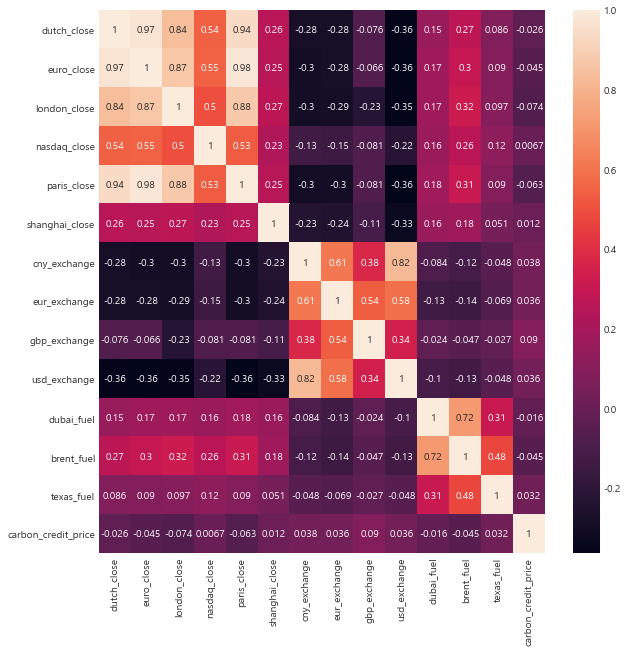

In [353]:
plt.figure(figsize = (10,10))
sns.heatmap(pd.concat([x_c1, y_c1], axis = 1).corr(), annot = True)

In [338]:
xc_train, xc_test, yc_train, yc_test = train_test_split(x_c1, y_c1, random_state = 10)

In [339]:
scale = StandardScaler()

scale.fit(xc_train)

xc_train_scale = scale.transform(xc_train)
xc_test_scale = scale.transform(xc_test)

In [340]:
from sklearn.metrics import mean_squared_error, r2_score

In [342]:
lr.fit(xc_train_scale, yc_train)
lr_preds = lr.predict(xc_test_scale)
print('LinearRegression')
print('rmse :', np.sqrt(mean_squared_error(yc_test, lr_preds)))
print('mse :',(mean_squared_error(yc_test, lr_preds)))
print('r_score :', r2_score(yc_test, lr_preds))
print('회귀계수 :\n' , lr.coef_)
print('절편 :' , lr.intercept_)
print()

rid.fit(xc_train_scale, yc_train)
rid_preds = rid.predict(xc_test_scale)
print('Ridge')
print('rmse :', np.sqrt(mean_squared_error(yc_test, rid_preds)))
print('mse :',(mean_squared_error(yc_test, rid_preds)))
print('r_score :', r2_score(yc_test, rid_preds))
print('회귀계수 :\n' , rid.coef_)
print('절편 :' , rid.intercept_)
print()

las.fit(xc_train_scale, yc_train)
las_preds = las.predict(xc_test_scale)
print('Lasso')
print('rmse :', np.sqrt(mean_squared_error(yc_test, las_preds)))
print('mse :',(mean_squared_error(yc_test, las_preds)))
print('r_score :', r2_score(yc_test, las_preds))
print('회귀계수 :\n' , las.coef_)
print('절편 :' , las.intercept_)
print()

xgb.fit(xc_train_scale, yc_train)
xgb_preds = xgb.predict(xc_test_scale)
print('xgb')
print('rmse :', np.sqrt(mean_squared_error(yc_test, xgb_preds)))
print('mse :',(mean_squared_error(yc_test, xgb_preds)))
print('r_score :', r2_score(yc_test, xgb_preds))
print()

lgbm.fit(xc_train_scale, yc_train)
lgbm_preds = lgbm.predict(xc_test_scale)
print('lgbm')
print('rmse :', np.sqrt(mean_squared_error(yc_test, lgbm_preds)))
print('mse :',(mean_squared_error(yc_test, lgbm_preds)))
print('r_score :', r2_score(yc_test, lgbm_preds))
print()

rfr.fit(xc_train_scale, yc_train)
rfr_preds = rfr.predict(xc_test_scale)
print('rfc')
print('rmse :', np.sqrt(mean_squared_error(yc_test, rfr_preds)))
print('mse :',(mean_squared_error(yc_test, rfr_preds)))
print('r_score :', r2_score(yc_test, rfr_preds))
print()

LinearRegression
rmse : 0.03522758857922003
mse : 0.0012409829971067937
r_score : -0.003068770730805248
회귀계수 :
 [ 0.00786532  0.00357171 -0.00325919  0.001096   -0.01105781  0.00090831
 -0.00048016 -0.00086062  0.00268239 -0.00029794 -0.00029093 -0.00081172
  0.00207685]
절편 : 0.002691074386041107

Ridge
rmse : 0.03522504465514908
mse : 0.0012408037709572468
r_score : -0.0029239048028044667
회귀계수 :
 [ 0.00787813  0.00316567 -0.0032754   0.00109417 -0.01064167  0.00090833
 -0.00047492 -0.00085279  0.00268211 -0.0003026  -0.00029477 -0.00081262
  0.00207587]
절편 : 0.002691074386041107

Lasso
rmse : 0.035287733011400445
mse : 0.001245224101083881
r_score : -0.006496794291769525
회귀계수 :
 [-0. -0. -0. -0. -0.  0.  0.  0.  0.  0. -0. -0.  0.]
절편 : 0.002691074386041107

xgb
rmse : 0.038939024972435565
mse : 0.0015162476658039604
r_score : -0.22556125733167387

lgbm
rmse : 0.03721343041794364
mse : 0.0013848394034711327
r_score : -0.11934584223786215

rfc
rmse : 0.03590217056006762
mse : 0.0012889

### cross validation

In [348]:
from sklearn.model_selection import cross_val_score

models = [lr, rid, las, xgb, lgbm, rfr]

for m in models:
    scores = cross_val_score(m, xc_train_scale, yc_train,  cv = 10)
    print(m.__class__.__name__)
    print('평균 accuracy score :' , np.mean(scores))
    print('표준편차 : ', np.std(scores))
    print()

LinearRegression
평균 accuracy score : -0.03842911997572233
표준편차 :  0.085760491398259

Ridge
평균 accuracy score : -0.03742058343178314
표준편차 :  0.08344366333761088

Lasso
평균 accuracy score : -0.010577542828053099
표준편차 :  0.012518043373714396

XGBRegressor
평균 accuracy score : -0.23737227889351314
표준편차 :  0.15733241190550204

LGBMRegressor
평균 accuracy score : -0.1448488534150046
표준편차 :  0.12383248946281872

RandomForestRegressor
평균 accuracy score : -0.0435716203385396
표준편차 :  0.0902885795898922



## gridsearch

In [349]:
params = {'alpha' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
models1 = [rid, las, xgb, lgbm]

In [350]:
from sklearn.model_selection import GridSearchCV


In [351]:
for m in models1:
    grid = GridSearchCV(m, param_grid = params )
    grid.fit(xc_train_scale, yc_train)
#     print('{}'.format(m))
    print(m.__class__.__name__)
    print('best_para : ', grid.best_params_)
    print('best_score : ', grid.best_score_)
    print()

Ridge
best_para :  {'alpha': 1000}
best_score :  -0.0020973254912759033

Lasso
best_para :  {'alpha': 0.01}
best_score :  -0.002675776795482454

XGBRegressor
best_para :  {'alpha': 0.001}
best_score :  -0.19832993059574977

LGBMRegressor
best_para :  {'alpha': 0.001}
best_score :  -0.15034089108474227



### => 탄소배출권의 변동률과 각 지수별 변동률은 큰 상관관계가 없다(모델로 쓸 수 없음)

# 3. 변동률을 이용한 분류모델
-  3일과 15일, 30일 이동평균을 계산 한 다음에 변동률로 바꿔줌

In [367]:
merge_df = pd.read_csv('merge_df.csv', index_col=0)

In [373]:
merge_df.head()

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price,carbon_credit_price_1d
date,,,,,,,,,,,,,,,
2015-12-29,10860.14,3314.28,6314.57,5107.94,4701.36,3563.74,177.71,1283.25,1741.53,1168.5,34.66,37.79,37.87,37.32,37.05
2015-12-30,10743.01,3287.98,6274.05,5065.85,4677.14,3572.88,178.10,1283.14,1738.97,1173.0,34.57,36.46,36.60,37.05,36.29
2016-01-04,10283.44,3164.76,6093.43,4903.09,4522.45,3296.26,179.60,1299.65,1756.77,1189.5,32.10,37.22,36.76,36.29,36.06
2016-01-05,10310.10,3178.01,6137.24,4891.43,4537.63,3287.71,179.00,1283.71,1746.66,1189.5,30.84,36.42,35.97,36.06,34.94
2016-01-06,10214.02,3139.32,6073.38,4835.77,4480.47,3361.84,178.65,1287.96,1756.44,1200.0,28.99,34.23,33.97,34.94,34.00


In [369]:
merge_df.columns

Index(['dutch_close', 'euro_close', 'london_close', 'nasdaq_close',
       'paris_close', 'shanghai_close', 'cny_exchange', 'eur_exchange',
       'gbp_exchange', 'usd_exchange', 'dubai_fuel', 'brent_fuel',
       'texas_fuel', 'carbon_credit_price'],
      dtype='object')

In [370]:
merge_df['carbon_credit_price_1d'] = merge_df['carbon_credit_price'].shift(-1)

In [371]:
merge_df.dropna(inplace = True)

In [372]:
merge_df.isnull().sum()

dutch_close               0
euro_close                0
london_close              0
nasdaq_close              0
paris_close               0
shanghai_close            0
cny_exchange              0
eur_exchange              0
gbp_exchange              0
usd_exchange              0
dubai_fuel                0
brent_fuel                0
texas_fuel                0
carbon_credit_price       0
carbon_credit_price_1d    0
dtype: int64

In [375]:
# 3, 15, 30일 이동평균

In [376]:
ma3 = merge_df.rolling(3).mean()
ma15 = merge_df.rolling(15).mean()
ma30 = merge_df.rolling(30).mean()

In [382]:
ma3.dropna(inplace = True)
ma3.head()

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price,carbon_credit_price_1d
date,,,,,,,,,,,,,,,
2016-01-04,10628.863333,3255.673333,6227.350000,5025.626667,4633.650000,3477.626667,178.470000,1288.680000,1745.756667,1177.000000,33.776667,37.156667,37.076667,36.886667,36.466667
2016-01-05,10445.516667,3210.250000,6168.240000,4953.456667,4579.073333,3385.616667,178.900000,1288.833333,1747.466667,1184.000000,32.503333,36.700000,36.443333,36.466667,35.763333
2016-01-06,10269.186667,3160.696667,6101.350000,4876.763333,4513.516667,3315.270000,179.083333,1290.440000,1753.290000,1193.000000,30.643333,35.956667,35.566667,35.763333,35.000000
2016-01-07,10167.990000,3134.003333,6054.900000,4805.543333,4473.893333,3258.183333,179.053333,1289.016667,1750.756667,1196.566667,29.610000,34.800000,34.403333,35.000000,34.106667
2016-01-08,10014.403333,3085.823333,5979.966667,4722.943333,4405.936667,3224.416667,179.190000,1295.733333,1752.653333,1199.900000,29.050000,33.843333,33.466667,34.106667,33.153333


In [383]:
ma15.dropna(inplace = True)
ma15.head()

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price,carbon_credit_price_1d
date,,,,,,,,,,,,,,,
2016-01-21,9998.722667,3076.743333,5971.182000,4700.749333,4391.098667,3143.768667,181.288667,1305.824000,1744.251333,1200.580000,28.850667,32.523333,32.459333,32.976000,32.385333
2016-01-22,9925.705333,3057.338667,5943.544667,4666.298667,4366.787333,3100.623333,181.541333,1306.898000,1742.126000,1202.613333,28.321333,32.149333,32.080667,32.385333,31.678000
2016-01-25,9858.581333,3038.258667,5917.074667,4629.808000,4342.400000,3058.332000,181.742667,1307.822667,1740.005333,1204.246667,27.775333,31.752000,31.663333,31.678000,31.078000
2016-01-26,9827.868667,3029.464000,5904.943333,4607.446667,4331.357333,3021.900000,181.920667,1308.341333,1736.880667,1205.280000,27.408000,31.390667,31.309333,31.078000,30.442667
2016-01-27,9799.250000,3020.494667,5895.152000,4579.229333,4320.872667,2985.090000,182.118667,1309.874000,1735.275333,1206.180000,27.132000,31.169333,31.064667,30.442667,29.930000


In [384]:
ma30.dropna(inplace = True)
ma30.head()

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price,carbon_credit_price_1d
date,,,,,,,,,,,,,,,
2016-02-19,9781.349333,3013.877333,5954.762667,4608.454667,4337.675333,2967.973333,182.459000,1317.175333,1739.917667,1205.090000,28.928333,33.023667,31.883667,29.175333,28.739667
2016-02-22,9738.464333,3001.198333,5945.534667,4590.543667,4324.253333,2946.754667,182.826667,1319.916667,1740.075667,1207.190000,28.758333,32.920333,31.734333,28.739667,28.237000
2016-02-23,9694.256333,2987.845000,5935.143333,4571.801333,4309.629333,2924.436333,183.177333,1322.472667,1740.173000,1209.173333,28.582333,32.814000,31.576667,28.237000,27.753667
2016-02-24,9657.068333,2976.361000,5927.601667,4559.785333,4297.392333,2912.191000,183.486333,1324.403667,1739.145667,1210.673333,28.490333,32.720333,31.423000,27.753667,27.309333
2016-02-25,9624.447667,2966.341333,5923.454000,4549.478000,4287.753000,2893.975333,183.845667,1327.211667,1738.626000,1212.390000,28.437667,32.682667,31.326333,27.309333,26.890333


In [88]:
# 변동률 계산(5일)

In [100]:
ma5 = (ma5  - ma5.shift())/ma5.shift()
ma5.dropna(inplace = True)
ma5

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2016-01-07,-0.016796,-0.014275,-0.011669,-0.016873,-0.012993,-0.025684,0.002016,0.001884,0.000874,0.005354,-0.035120,-0.022183,-0.025391,-0.018276
2016-01-08,-0.017343,-0.016053,-0.011844,-0.017314,-0.015180,-0.023220,0.001464,0.003212,0.001529,0.004452,-0.034791,-0.016341,-0.019482,-0.020579
2016-01-11,-0.009052,-0.008799,-0.007345,-0.011063,-0.009413,-0.017196,0.003046,0.001882,-0.000067,0.002843,-0.028250,-0.032369,-0.030902,-0.024103
2016-01-12,-0.006470,-0.007330,-0.006945,-0.008672,-0.007200,-0.016576,0.005640,0.005512,0.001780,0.003836,-0.024066,-0.032802,-0.032960,-0.023877
2016-01-13,-0.005076,-0.004319,-0.003780,-0.013183,-0.004041,-0.026236,0.004978,0.002340,-0.001762,0.000665,-0.013840,-0.023911,-0.021510,-0.013943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26,0.003106,0.002738,0.001666,0.001407,0.002885,0.000250,-0.001739,-0.002600,-0.001968,-0.001956,0.003959,0.001337,0.005314,0.018295
2021-10-27,0.002348,0.002327,0.000835,0.001504,0.001426,-0.001374,-0.000337,-0.000919,-0.000909,-0.000256,-0.000901,-0.004569,-0.001818,0.007243
2021-10-28,0.002866,0.003725,0.001637,0.003058,0.003508,-0.004255,-0.001154,-0.001788,-0.001804,-0.001194,-0.000414,-0.002236,0.000743,0.002000


In [97]:
# 변동률 계산(3일)

In [101]:
ma3 = (ma3  - ma3 .shift())/ma3.shift()
ma3.dropna(inplace = True)
ma3

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2016-01-05,-0.017250,-0.013952,-0.009492,-0.014360,-0.011778,-0.026458,0.002409,0.000119,0.000980,0.005947,-0.037699,-0.012290,-0.017082,-0.011386
2016-01-06,-0.016881,-0.015436,-0.010844,-0.015483,-0.014317,-0.020778,0.001025,0.001247,0.003332,0.007601,-0.057225,-0.020254,-0.024056,-0.019287
2016-01-07,-0.009854,-0.008445,-0.007613,-0.014604,-0.008779,-0.017219,-0.000168,-0.001103,-0.001445,0.002990,-0.033721,-0.032168,-0.032709,-0.021344
2016-01-08,-0.015105,-0.015373,-0.012376,-0.017188,-0.015190,-0.010364,0.000763,0.005211,0.001083,0.002786,-0.018913,-0.027490,-0.027226,-0.025524
2016-01-11,-0.012946,-0.012080,-0.011235,-0.013959,-0.012690,-0.035680,0.006846,0.006141,-0.000049,0.001806,-0.012966,-0.026396,-0.025498,-0.027952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26,0.006103,0.005445,0.004039,0.000440,0.003991,0.000265,-0.001957,-0.003480,-0.002466,-0.002979,0.007283,0.004073,0.008599,0.010445
2021-10-27,0.003472,0.002545,0.002245,0.003197,0.000981,-0.001880,-0.001198,-0.001919,-0.002321,-0.000711,-0.000687,-0.006476,-0.004362,0.009201
2021-10-28,0.002063,0.003606,0.001225,0.004845,0.004515,-0.008490,-0.000782,-0.000630,-0.000372,-0.000142,-0.005861,-0.005929,-0.003784,-0.002351


In [133]:
# 변동률을 0 보다 크면 2 0이면 1 0보다 작으면 0 리턴하는 함수
def plus_minus(x) :
    i=0
    L=[]

    while i < len(x):
        if x[i] > 0:
            t = 2
        elif x[i] == 0 :
            t = 1
        else :
            t = 0
        i +=1
        L.append(t)
    return L

In [134]:
# 5일 이동평균의 변동률
ma5_1 = pd.DataFrame(index = ma5.index)

for i in ma3.columns:
    ma5_1['{}'.format(i)] = plus_minus(ma5['{}'.format(i)])
ma5_1

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2016-01-07,0,0,0,0,0,0,2,2,2,2,0,0,0,0
2016-01-08,0,0,0,0,0,0,2,2,2,2,0,0,0,0
2016-01-11,0,0,0,0,0,0,2,2,0,2,0,0,0,0
2016-01-12,0,0,0,0,0,0,2,2,2,2,0,0,0,0
2016-01-13,0,0,0,0,0,0,2,2,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26,2,2,2,2,2,2,0,0,0,0,2,2,2,2
2021-10-27,2,2,2,2,2,0,0,0,0,0,0,0,0,2
2021-10-28,2,2,2,2,2,0,0,0,0,0,0,0,2,2


In [135]:
# 3일 이동평균의 변동률
ma3_1 = pd.DataFrame(index = ma3.index)

for i in ma3.columns:
    ma3_1['{}'.format(i)] = plus_minus(ma3['{}'.format(i)])
ma3_1

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
date,,,,,,,,,,,,,,
2016-01-05,0,0,0,0,0,0,2,2,2,2,0,0,0,0
2016-01-06,0,0,0,0,0,0,2,2,2,2,0,0,0,0
2016-01-07,0,0,0,0,0,0,0,0,0,2,0,0,0,0
2016-01-08,0,0,0,0,0,0,2,2,2,2,0,0,0,0
2016-01-11,0,0,0,0,0,0,2,2,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26,2,2,2,2,2,2,0,0,0,0,2,2,2,2
2021-10-27,2,2,2,2,2,0,0,0,0,0,0,0,0,2
2021-10-28,2,2,2,2,2,0,0,0,0,0,0,0,0,0


In [107]:
# 3일 이동평균 분석 시작

In [136]:
x3 = ma3_1.iloc[:,:-1]
y3 = ma3_1.iloc[:,-1]


In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [138]:
tree = DecisionTreeClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
rfc = RandomForestClassifier()

In [139]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x3,y3, random_state = 3)

In [140]:
models = [tree, mnb, rfc]

In [141]:
for m in models :
    m.fit(x_train, y_train)
    preds = m.predict(x_test)
    accuracy = m.score(x_test, y_test)
    print(m.__class__.__name__, ':' , accuracy)

DecisionTreeClassifier : 0.5153374233128835
MultinomialNB : 0.5521472392638037
RandomForestClassifier : 0.5184049079754601


In [142]:
from sklearn.metrics import classification_report

In [143]:
for m in models:
    preds = m.predict(x_test)
    class_report = classification_report(y_test, preds)
    print(m.__class__.__name__, '\n' , class_report)
    print('================')

DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.51      0.44      0.47       161
           1       0.00      0.00      0.00         3
           2       0.52      0.60      0.55       162

    accuracy                           0.52       326
   macro avg       0.34      0.35      0.34       326
weighted avg       0.51      0.52      0.51       326

MultinomialNB 
               precision    recall  f1-score   support

           0       0.59      0.35      0.44       161
           1       0.00      0.00      0.00         3
           2       0.54      0.77      0.63       162

    accuracy                           0.55       326
   macro avg       0.38      0.37      0.36       326
weighted avg       0.56      0.55      0.53       326

RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.52      0.37      0.43       161
           1       0.00      0.00      0.00         3
         

In [119]:
### cross validation

In [121]:
from sklearn.model_selection import cross_val_score

models = [tree, gnb, rfc]

for m in models:
    scores = cross_val_score(m, x_train, y_train,  cv = 10)
    print(m.__class__.__name__)
    print('평균 accuracy score :' , np.mean(scores))
    print('표준편차 : ', np.std(scores))
    print()

DecisionTreeClassifier
평균 accuracy score : 0.5414475068377866
표준편차 :  0.04334132862342329

GaussianNB
평균 accuracy score : 0.5035135703766043
표준편차 :  0.041814238449624924

RandomForestClassifier
평균 accuracy score : 0.5508100147275405
표준편차 :  0.04195587484902865



In [124]:
from sklearn.model_selection import GridSearchCV

In [127]:
parameters = {'max_depth': [3, 5, 7],
              'min_samples_split': [3, 5, 7],
              'splitter': ['best', 'random']}

grid = GridSearchCV(tree, # estimator 객체,
                      param_grid = parameters, cv = 5)
                      # n_jobs = -1: 모든 cpu를 사용)

grid.fit(x_train, y_train)

result = pd.DataFrame(grid.cv_results_['params'])
result['mean_test_score'] = grid.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)


,max_depth,min_samples_split,splitter,mean_test_score
0,3,3,best,0.596923
2,3,5,best,0.596923
4,3,7,best,0.596923
3,3,5,random,0.593846
1,3,3,random,0.588718
5,3,7,random,0.586667
9,5,5,random,0.582564
15,7,5,random,0.576410
17,7,7,random,0.572308
11,5,7,random,0.567179


In [ ]:
gnb()

In [95]:
# ======================= old version ===========================

### Regressor

In [74]:
x1 = merge_df.drop(['carbon_credit_price','date'],axis=1)
y1 = merge_df['carbon_credit_price']

In [75]:
x1.head()

,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel
0,15806.29,4280.47,7288.62,15595.92,6893.29,3544.48,184.34,1363.64,1608.89,1178.5,82.38,84.71,84.05
1,15688.77,4250.56,7237.57,15498.39,6830.34,3547.34,183.35,1357.50,1606.33,1174.0,81.37,83.72,83.57
2,15696.33,4233.87,7249.47,15448.12,6804.22,3518.42,183.04,1358.48,1610.84,1170.5,81.27,83.66,82.81
3,15705.81,4220.88,7253.27,15235.84,6753.52,3562.31,183.56,1360.73,1609.51,1173.5,81.44,83.87,82.66
4,15757.06,4223.97,7277.62,15235.72,6766.51,3597.64,183.02,1356.40,1613.44,1167.0,83.23,85.65,84.65


In [76]:
y1.head()

0    254.77
1    262.68
2    262.06
3    268.01
4    267.61
Name: carbon_credit_price, dtype: float64

In [77]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, random_state=100)

In [79]:
scaler = StandardScaler()
scaler.fit(x_train1)

x_train_scaled1 = scaler.transform(x_train1)
x_test_scaled1 = scaler.transform(x_test1)

In [80]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
rfr = RandomForestRegressor()

lr.fit(x_train_scaled1, y_train1)
lr_preds = lr.predict(x_test_scaled1)
print('LinearRegression')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lr_preds)))
print('r_score :', r2_score(y_test1, lr_preds))
print()

rid.fit(x_train_scaled1, y_train1)
rid_preds = rid.predict(x_test_scaled1)
print('Ridge')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rid_preds)))
print('r_score :', r2_score(y_test1, rid_preds))
print()

las.fit(x_train_scaled1, y_train1)
las_preds = las.predict(x_test_scaled1)
print('Lasso')
print('rmse :', np.sqrt(mean_squared_error(y_test1, las_preds)))
print('r_score :', r2_score(y_test1, las_preds))
print()

xgb.fit(x_train_scaled1, y_train1)
xgb_preds = xgb.predict(x_test_scaled1)
print('XGBRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, xgb_preds)))
print('r_score :', r2_score(y_test1, xgb_preds))
print()

lgbm.fit(x_train_scaled1, y_train1)
lgbm_preds = lgbm.predict(x_test_scaled1)
print('LGBMRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, lgbm_preds)))
print('r_score :', r2_score(y_test1, lgbm_preds))
print()

rfr.fit(x_train_scaled1, y_train1)
rfr_preds = rfr.predict(x_test_scaled1)
print('RandomForestRegressor')
print('rmse :', np.sqrt(mean_squared_error(y_test1, rfr_preds)))
print('r_score :', r2_score(y_test1, rfr_preds))
print()

LinearRegression
rmse : 15.041803946996154
r_score : 0.9529656917468655

Ridge
rmse : 15.017883076219423
r_score : 0.9531151694283095

Lasso
rmse : 16.921056365975026
r_score : 0.9404790495228441

XGBRegressor
rmse : 5.961406963484271
r_score : 0.9926122455101068

LGBMRegressor
rmse : 6.260046378014654
r_score : 0.9918535196388419

RandomForestRegressor
rmse : 5.406524407514412
r_score : 0.9939235315221726



### cross validation

In [89]:
from sklearn.model_selection import cross_val_score

models = [lr, rid, las, xgb, lgbm, rfr]

for m in models:
    scores = cross_val_score(m, x_train_scaled1, y_train1,  cv = 5)
    print(m.__class__.__name__)
    print('평균 accuracy score :' , np.mean(scores))
    print('표준편차 : ', np.std(scores))
    print()

LinearRegression
평균 accuracy score : 0.9598662162265527
표준편차 :  0.0075826848642730465

Ridge
평균 accuracy score : 0.9598295098686528
표준편차 :  0.007418196323060191

Lasso
평균 accuracy score : 0.944775713163503
표준편차 :  0.009898213894536143

XGBRegressor
평균 accuracy score : 0.9927852188804863
표준편차 :  0.0014074213433740027

LGBMRegressor
평균 accuracy score : 0.9919456733123517
표준편차 :  0.0015900368249717048

RandomForestRegressor
평균 accuracy score : 0.9926847668870963
표준편차 :  0.003115686850859842



## gridsearch

In [82]:
params = {'alpha' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
models1 = [rid, las, xgb, lgbm]

In [83]:
from sklearn.model_selection import GridSearchCV


In [87]:
for m in models1:
    grid = GridSearchCV(m, param_grid = params )
    grid.fit(x_train_scaled1, y_train1)
#     print('{}'.format(m))
    print(m.__class__.__name__)
    print('best_para : ', grid.best_params_)
    print('best_score : ', grid.best_score_)
    print()

Ridge
best_para :  {'alpha': 0.1}
best_score :  0.9598714124024331

Lasso
best_para :  {'alpha': 0.001}
best_score :  0.9598659047797004

XGBRegressor
best_para :  {'alpha': 0.001}
best_score :  0.9927852188804863

LGBMRegressor
best_para :  {'alpha': 0.001}
best_score :  0.9919456733123517



## classification

In [59]:
merge_df2 = merge_df.copy()
merge_df2.head(5)

,date,dutch_close,euro_close,london_close,nasdaq_close,paris_close,shanghai_close,cny_exchange,eur_exchange,gbp_exchange,usd_exchange,dubai_fuel,brent_fuel,texas_fuel,carbon_credit_price
0,2021-11-01,15806.29,4280.47,7288.62,15595.92,6893.29,3544.48,184.34,1363.64,1608.89,1178.5,82.38,84.71,84.05,254.77
1,2021-10-29,15688.77,4250.56,7237.57,15498.39,6830.34,3547.34,183.35,1357.50,1606.33,1174.0,81.37,83.72,83.57,262.68
2,2021-10-28,15696.33,4233.87,7249.47,15448.12,6804.22,3518.42,183.04,1358.48,1610.84,1170.5,81.27,83.66,82.81,262.06
3,2021-10-27,15705.81,4220.88,7253.27,15235.84,6753.52,3562.31,183.56,1360.73,1609.51,1173.5,81.44,83.87,82.66,268.01
4,2021-10-26,15757.06,4223.97,7277.62,15235.72,6766.51,3597.64,183.02,1356.40,1613.44,1167.0,83.23,85.65,84.65,267.61


In [60]:
merge_df2['dutch_close'] = (merge_df2['dutch_close'].shift()-merge_df2['dutch_close'])/merge_df2['dutch_close']
merge_df2['euro_close'] = (merge_df2['euro_close'].shift()-merge_df2['euro_close'])/merge_df2['euro_close']
merge_df2['london_close'] = (merge_df2['london_close'].shift()-merge_df2['london_close'])/merge_df2['london_close']
merge_df2['nasdaq_close'] = (merge_df2['nasdaq_close'].shift()-merge_df2['nasdaq_close'])/merge_df2['nasdaq_close']
merge_df2['paris_close'] = (merge_df2['paris_close'].shift()-merge_df2['paris_close'])/merge_df2['paris_close']
merge_df2['shanghai_close'] = (merge_df2['shanghai_close'].shift()-merge_df2['shanghai_close'])/merge_df2['shanghai_close']

merge_df2['cny_exchange'] = (merge_df2['cny_exchange'].shift()-merge_df2['cny_exchange'])/merge_df2['cny_exchange']
merge_df2['eur_exchange'] = (merge_df2['eur_exchange'].shift()-merge_df2['eur_exchange'])/merge_df2['eur_exchange']
merge_df2['gbp_exchange'] = (merge_df2['gbp_exchange'].shift()-merge_df2['gbp_exchange'])/merge_df2['gbp_exchange']
merge_df2['usd_exchange'] = (merge_df2['usd_exchange'].shift()-merge_df2['usd_exchange'])/merge_df2['usd_exchange']

merge_df2['dubai_fuel'] = (merge_df2['dubai_fuel'].shift()-merge_df2['dubai_fuel'])/merge_df2['dubai_fuel']
merge_df2['brent_fuel'] = (merge_df2['brent_fuel'].shift()-merge_df2['brent_fuel'])/merge_df2['brent_fuel']
merge_df2['texas_fuel'] = (merge_df2['texas_fuel'].shift()-merge_df2['texas_fuel'])/merge_df2['texas_fuel']

merge_df2['carbon_credit_price'] = (merge_df2['carbon_credit_price'].shift()-merge_df2['carbon_credit_price'])/merge_df2['carbon_credit_price']
merge_df2['carbon_credit_price'] = merge_df2['carbon_credit_price'].apply(lambda x : 1 if x>0 else 0)

In [61]:
merge_df2 = merge_df2.dropna()

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [63]:
x2 = merge_df2.drop(['carbon_credit_price','date'],axis=1)
y2 = merge_df2['carbon_credit_price']

In [64]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2,random_state=100)

In [65]:
log = LogisticRegression()
log.fit(x_train2, y_train2)

tree = DecisionTreeClassifier()
tree.fit(x_train2, y_train2)

gnb = GaussianNB()
gnb.fit(x_train2, y_train2)

rfc = RandomForestClassifier()
rfc.fit(x_train2, y_train2)

RandomForestClassifier()

In [66]:
from sklearn.metrics import accuracy_score

log_preds = log.predict(x_test2)
print('LogisticRegression')
print(accuracy_score(y_test2, log_preds))
print()

tree_preds = tree.predict(x_test2)
print('DecisionTreeClassifier')
print(accuracy_score(y_test2,tree_preds))
print()

gnb_preds = log.predict(x_test2)
print('GaussianNB')
print(accuracy_score(y_test2, gnb_preds))
print()

rfc_preds = tree.predict(x_test2)
print('RandomForestClassifier')
print(accuracy_score(y_test2,rfc_preds))
print()

LogisticRegression
0.5797546012269938

DecisionTreeClassifier
0.5122699386503068

GaussianNB
0.5797546012269938

RandomForestClassifier
0.5122699386503068



In [67]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test2, log_preds)
print('logistic')
print(class_report)

class_report = classification_report(y_test2, tree_preds)
print('tree')
print(class_report)

class_report = classification_report(y_test2, gnb_preds)
print('naivebasys')
print(class_report)

class_report = classification_report(y_test2, rfc_preds)
print('randomforest')
print(class_report)

logistic
              precision    recall  f1-score   support

           0       0.87      0.20      0.33       166
           1       0.54      0.97      0.69       160

    accuracy                           0.58       326
   macro avg       0.71      0.59      0.51       326
weighted avg       0.71      0.58      0.51       326

tree
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       166
           1       0.50      0.50      0.50       160

    accuracy                           0.51       326
   macro avg       0.51      0.51      0.51       326
weighted avg       0.51      0.51      0.51       326

naivebasys
              precision    recall  f1-score   support

           0       0.87      0.20      0.33       166
           1       0.54      0.97      0.69       160

    accuracy                           0.58       326
   macro avg       0.71      0.59      0.51       326
weighted avg       0.71      0.58      0.51      

### cross validation

In [88]:
from sklearn.model_selection import cross_val_score

models = [log, tree, gnb, rfc]

for m in models:
    scores = cross_val_score(m, x_train2, y_train2,  cv = 5)
#     print('{}'.format(m))
    print(m.__class__.__name__)
    print('평균 accuracy score :' , np.mean(scores))
    print('표준편차 : ', np.std(scores))
    print()

LogisticRegression
평균 accuracy score : 0.56294610151753
표준편차 :  0.008334890313570155

DecisionTreeClassifier
평균 accuracy score : 0.5291836734693878
표준편차 :  0.012827405530806826

GaussianNB
평균 accuracy score : 0.5598273155416013
표준편차 :  0.03876097975622213

RandomForestClassifier
평균 accuracy score : 0.5844374672946102
표준편차 :  0.01059332728851694



In [159]:
# roc 곡선

In [69]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test2, log.predict_proba(x_test2)[:,1])

In [70]:
print(precision[:10])
print(recall[:10])
print(thresholds[:10])

[0.50632911 0.5047619  0.50636943 0.50798722 0.50961538 0.51125402
 0.51290323 0.51456311 0.51623377 0.51791531]
[1.      0.99375 0.99375 0.99375 0.99375 0.99375 0.99375 0.99375 0.99375
 0.99375]
[0.46626526 0.46996327 0.47208511 0.47862646 0.47938464 0.4817773
 0.48180697 0.48251546 0.4848127  0.4853283 ]


Text(0, 0.5, '재현율')

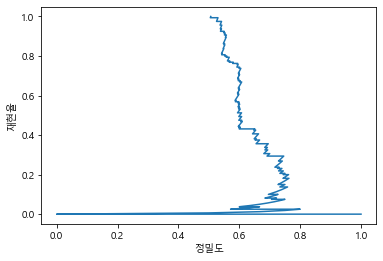

In [71]:
plt.plot(precision, recall)
plt.xlabel('정밀도')
plt.ylabel('재현율')

In [72]:
from sklearn.metrics import average_precision_score
print('logistic')
print('평균 정밀도 점수 : ' , average_precision_score(y_test2, log.predict_proba(x_test2)[:,1]))

logistic
평균 정밀도 점수 :  0.6343565731659404
